**Importing packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing Dataset**

In [2]:
df = pd.read_csv('./archive/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [4]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.shape

(300153, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
# top source - destination pairs according to price
df.groupby(['source_city','destination_city'])['price'].sum().reset_index().sort_values(["price"], ascending = False)[0:10]

,source_city,destination_city,price
4,Bangalore,Mumbai,299261197
25,Mumbai,Bangalore,298260354
14,Delhi,Mumbai,295931282
29,Mumbai,Kolkata,282022007
27,Mumbai,Delhi,277303264
24,Kolkata,Mumbai,253178558
10,Delhi,Bangalore,250537591
13,Delhi,Kolkata,245439530
1,Bangalore,Delhi,243801907
3,Bangalore,Kolkata,235658614


In [8]:
# top flight-airline pairs according to price
df.groupby(['flight','airline'])['price'].sum().reset_index().sort_values(["price"], ascending = False)[:10]

,flight,airline,price
1442,UK-706,Vistara,105871560
1454,UK-772,Vistara,97212901
1445,UK-720,Vistara,85182167
1490,UK-836,Vistara,84379393
1492,UK-838,Vistara,76476372
1486,UK-832,Vistara,75725325
1515,UK-870,Vistara,75587988
1508,UK-860,Vistara,73808038
1483,UK-828,Vistara,69011665
1485,UK-830,Vistara,68296616


In [9]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [10]:
df.drop(['Unnamed: 0','flight', 'arrival_time'],axis=1,inplace=True)

In [11]:
df.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Mumbai,Economy,2.33,1,5955


In [12]:
for i in df.columns:
    temp = df[i].unique()
    print(f"\n{i} : {temp}\n")


airline : ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


source_city : ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


departure_time : ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


stops : ['zero' 'one' 'two_or_more']


destination_city : ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


class : ['Economy' 'Business']


duration : [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.92 11.17
 12.17 15.58 15.75  7.92 13.25 16.   22.75  6.33  7.25 30.08 18.25  6.08
  2.   12.33  3.5  10.25 14.17 25.58  4.08  9.75  6.67  9.67 10.08 12.58
  

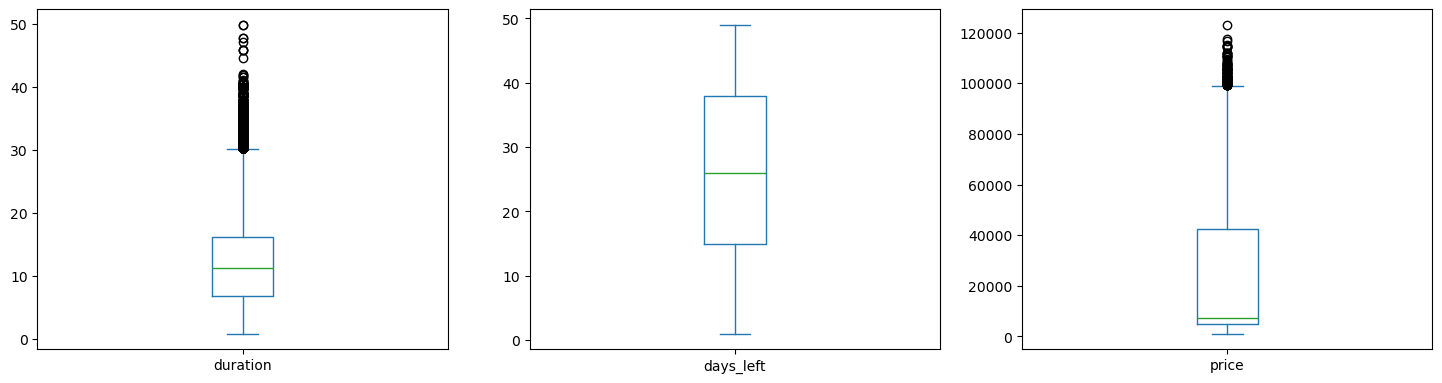

In [13]:
df.plot(kind='box',subplots = True,layout=(3,3),figsize=(18,15))
plt.show()

**One hot encoding**

In [14]:
from sklearn.preprocessing import LabelEncoder
airline = LabelEncoder()
stops=LabelEncoder()
clas=LabelEncoder()

In [15]:
df['airline']=airline.fit_transform(df['airline'])
df['source_city']=airline.fit_transform(df['source_city'])
df['destination_city']=airline.fit_transform(df['destination_city'])
df['departure_time']=airline.fit_transform(df['departure_time'])
# df['arrival_time']=airline.fit_transform(df['arrival_time'])
df['stops']=stops.fit_transform(df['stops'])
df['class']=clas.fit_transform(df['class'])

In [16]:
df

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,price
0,4,2,2,2,5,1,2.17,1,5953
1,4,2,1,2,5,1,2.33,1,5953
2,0,2,1,2,5,1,2.17,1,5956
3,5,2,4,2,5,1,2.25,1,5955
4,5,2,4,2,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,3,0,10.08,49,69265
300149,5,1,0,0,3,0,10.42,49,77105
300150,5,1,1,0,3,0,13.83,49,79099
300151,5,1,1,0,3,0,10.00,49,81585


In [17]:
for i in df.columns:
    temp = df[i].unique()
    print(f"\n{i} : {temp}\n")


airline : [4 0 5 2 3 1]


source_city : [2 5 0 4 3 1]


departure_time : [2 1 4 0 5 3]


stops : [2 0 1]


destination_city : [5 0 4 3 1 2]


class : [1 0]


duration : [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.92 11.17
 12.17 15.58 15.75  7.92 13.25 16.   22.75  6.33  7.25 30.08 18.25  6.08
  2.   12.33  3.5  10.25 14.17 25.58  4.08  9.75  6.67  9.67 10.08 12.58
  7.    8.25 15.5  10.17 23.5  25.75 11.5  21.42 14.25  7.75  5.33  5.67
  4.75 19.33  6.25 10.33  9.08 15.42  4.83 25.83  7.5  27.58 28.42  6.42
 24.58 16.5  11.33 24.83 14.92 26.08  5.42 28.5  27.33  8.67 20.42 20.08
  5.92 20.58 26.17 17.5  18

In [18]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'destination_city',
       'class', 'duration', 'days_left', 'price'],
      dtype='object')

**Scaling data before clustering**

In [23]:
from sklearn.preprocessing import StandardScaler

X_temp = X.values
scaler = StandardScaler().fit_transform(X_temp)
X_scaled = pd.DataFrame(scaler,columns=['airline', 'source_city', 'departure_time', 'stops', 'destination_city', 'class', 'duration', 'days_left'])
X_scaled.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left
0,0.488270,-0.329721,-0.237897,2.577006,1.382425,0.672576,-1.397531,-1.843875
1,0.488270,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.375284,-1.843875
2,-1.693633,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.397531,-1.843875
3,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.386407,-1.843875
4,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.375284,-1.843875


In [20]:
# X_temp = df.values
# scaler = StandardScaler()
# # df = pd.DataFrame(scaler.fit_transform(X_temp))
# df = pd.DataFrame(scaler.fit_transform(X_temp),columns=['airline', 'source_city', 'departure_time', 'stops', 'destination_city', 'class', 'duration', 'days_left','price'])
# df.head()

In [21]:
X = df.drop(['price'],axis=1)
y = df['price']

In [22]:
X.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left
0,4,2,2,2,5,1,2.17,1
1,4,2,1,2,5,1,2.33,1
2,0,2,1,2,5,1,2.17,1
3,5,2,4,2,5,1,2.25,1
4,5,2,4,2,5,1,2.33,1


In [24]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [25]:
# y.head()

# scaler = StandardScaler()
# scaler.fit(df[['price']])
# df['price'] = scaler.transform(df[['price']])
# df.head()

In [26]:
# X_scaled = X

In [27]:
X_scaled.describe().T[['min', 'mean', 'std', '50%', 'max']]
# X.describe().style.background_gradient(axis=1)

,min,mean,std,50%,max
airline,-1.693633,1.181740e-16,1.000002,-0.057206,1.033746
source_city,-1.471431,2.727093e-17,1.000002,-0.329721,1.382843
departure_time,-1.377971,7.272249e-17,1.000002,-0.237897,1.472212
stops,-0.426792,-2.121073e-17,1.000002,-0.426792,2.577006
destination_city,-1.483659,-2.677854e-16,1.000002,0.235992,1.382425
class,-1.486822,-1.151439e-16,1.000002,0.672576,0.672576
duration,-1.583849,9.999342e-17,1.000002,-0.135014,5.229290
days_left,-1.843875,1.166590e-16,1.000002,-0.000350,1.695692


**Kmeans Clustering on scaled data**

In [29]:
from sklearn.cluster import KMeans

In [148]:
#finding elbow

k_rng= range(75,85)
sse = []
# silhouette_scores = []
for k in k_rng:
    km = KMeans(n_clusters=k,n_init='auto')
    km.fit(X_scaled)
    ## now the function km.inertia_ gives us the sse = sum of squared error
    sse.append(km.inertia_)
    print(km.inertia_)
    # silhouette_scores.append(silhouette_score(X, km.labels_))
    # print(silhouette_scores)

527540.9285039713
525407.6618902385
518248.0208583327
515229.9172084659
516294.2827895131
510297.67410486296
507390.2923199535
504606.7809542455
502919.49754382053
499383.0073874595


**Elbow Plot**

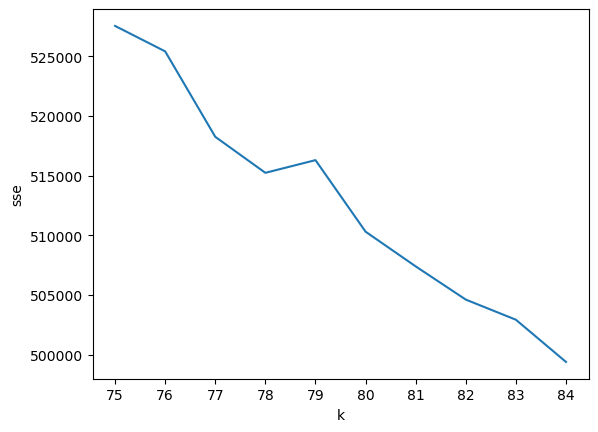

In [150]:
# plt.figure(figsize=(10,10))
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_rng,sse)
new_ticks = np.arange(75, 85, 1)
plt.xticks(new_ticks)

plt.show()

**Optimal clusters = 80**

In [30]:
km=KMeans(n_clusters=80,n_init='auto')
y_clusters = km.fit_predict(X_scaled)
y_clusters

array([ 7,  7,  7, ..., 42, 76, 60], dtype=int32)

In [31]:
X_scaled['cluster'] = y_clusters
X_scaled.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,cluster
0,0.488270,-0.329721,-0.237897,2.577006,1.382425,0.672576,-1.397531,-1.843875,7
1,0.488270,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.375284,-1.843875,7
2,-1.693633,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.397531,-1.843875,7
3,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.386407,-1.843875,7
4,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.375284,-1.843875,7


In [32]:
X_scaled.cluster.value_counts().describe()

count      80.000000
mean     3751.912500
std      1198.678716
min      1966.000000
25%      2647.000000
50%      3500.000000
75%      4673.250000
max      6424.000000
Name: count, dtype: float64

**Performing knn classification**

In [33]:
df_knn = X_scaled
df_knn.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,cluster
0,0.488270,-0.329721,-0.237897,2.577006,1.382425,0.672576,-1.397531,-1.843875,7
1,0.488270,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.375284,-1.843875,7
2,-1.693633,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.397531,-1.843875,7
3,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.386407,-1.843875,7
4,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.375284,-1.843875,7


In [34]:
X_knn = df_knn.drop(['cluster'],axis=1)
y_knn = df_knn['cluster']

In [35]:
X_knn.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left
0,0.488270,-0.329721,-0.237897,2.577006,1.382425,0.672576,-1.397531,-1.843875
1,0.488270,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.375284,-1.843875
2,-1.693633,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.397531,-1.843875
3,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.386407,-1.843875
4,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.375284,-1.843875


In [36]:
y_knn.head()

0    7
1    7
2    7
3    7
4    7
Name: cluster, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=1)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [76]:
clf = GridSearchCV(KNeighborsClassifier(),{
    "n_neighbors": range(25,75)
},cv=2,return_train_score=False)

clf.fit(X_knn,y_knn)
clf.cv_results_

{'mean_fit_time': array([0.08881474, 0.08822536, 0.0885576 , 0.08795047, 0.08829689,
        0.08782685, 0.08806753, 0.08779943, 0.08821797, 0.08786464,
        0.08792758, 0.08775985, 0.08788002, 0.08771658, 0.08856654,
        0.08774722, 0.08795154, 0.08806157, 0.08822656, 0.09064257,
        0.09985256, 0.08801675, 0.08783567, 0.09232962, 0.08769143,
        0.0879631 , 0.08778155, 0.08789957, 0.08767343, 0.08827806,
        0.08773696, 0.08939195, 0.08785725, 0.08792496, 0.1268065 ,
        0.08801687, 0.09066451, 0.09141099, 0.11038792, 0.09121358,
        0.09080744, 0.09012246, 0.10217452, 0.09235919, 0.08977461,
        0.09854901, 0.0878365 , 0.08828497, 0.08763814, 0.08787453]),
 'std_fit_time': array([5.35011292e-04, 8.15391541e-05, 5.92350960e-04, 1.74522400e-04,
        5.81741333e-05, 1.54852867e-04, 1.17540359e-04, 7.85589218e-05,
        1.54018402e-04, 5.74588776e-05, 8.58306885e-06, 7.90357590e-05,
        5.59091568e-05, 2.53438950e-04, 3.76462936e-04, 1.02877617e-0

In [77]:
pd.DataFrame(clf.cv_results_)[['param_n_neighbors','mean_test_score']]

,param_n_neighbors,mean_test_score
0,25,0.797280
1,26,0.797770
2,27,0.796894
3,28,0.797606
4,29,0.797137
5,30,0.798146
6,31,0.797823
7,32,0.798296
8,33,0.797460
9,34,0.798386


In [39]:
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=150)

In [40]:
# knn.predict(X_test[1])

In [41]:
knn.score(X_test,y_test)

0.9545401542536356

In [42]:
X_temp = X_scaled.drop(['cluster'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=1)

In [43]:
X_train

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left
46891,-0.057206,1.382843,-0.807934,2.577006,-0.337225,0.672576,-1.410045,-0.295314
258371,1.033746,-1.471431,-0.237897,-0.426792,0.235992,-1.486822,0.699248,1.032023
263532,1.033746,0.811988,-0.237897,-0.426792,-0.337225,-1.486822,0.722885,1.105764
241856,1.033746,1.382843,-0.807934,-0.426792,-0.910442,-1.486822,0.421160,-1.401429
202730,-0.057206,-0.900576,0.902176,-0.426792,0.235992,0.672576,-0.958153,-1.696393
...,...,...,...,...,...,...,...,...
21440,-0.057206,-0.329721,-1.377971,-0.426792,0.809208,0.672576,-0.969276,-1.253947
117583,1.033746,-1.471431,-0.237897,-0.426792,-0.910442,0.672576,0.514320,-0.000350
73349,-0.057206,1.382843,-0.237897,-0.426792,0.235992,0.672576,-0.910878,-0.221573
267336,-1.148157,0.811988,-0.237897,-0.426792,-1.483659,-1.486822,0.988459,-1.770134


In [46]:
# from sklearn.neighbors import KNeighborsRegressor
# knnr = KNeighborsRegressor(n_neighbors=50)
# knnr.fit(X_train,y_train)

from sklearn.tree import DecisionTreeRegressor  

Rtree = DecisionTreeRegressor(criterion='friedman_mse',max_depth = 10, max_features=9, random_state=42)
Rtree.fit(X_train, y_train)

# import xgboost
# xgb = xgboost.XGBRegressor()
# xgb.fit(X_train,y_train)

# from sklearn.svm import SVR
# svr = SVR()
# svr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=9,
                      random_state=42)

In [261]:
Rtree.score(X_train, y_train)

0.962393988952815

In [256]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = Rtree.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

3532.9459543502753

In [257]:
test_preds = Rtree.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

3549.2981033160236

In [258]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
mean_absolute_error(y_test,test_preds)

2059.869687458558

In [63]:
# from sklearn.svm import SVR

def prediction(df1,df2):
    y_temp = df2['price']
    # print(y_temp)
    df2 = df2.drop(['price','cluster'],axis=1)
    temp = knn.predict(df2)
    # print(temp)

    df_cluster = df1[df1['cluster']==temp[0]]

    x = df_cluster.drop(['cluster','price'],axis=1)
    y = df_cluster['price']
    model = DecisionTreeRegressor(criterion='friedman_mse',max_depth = 10, max_features=9, random_state=42)
    model.fit(x,y)
    predicted = model.predict(df2)
    # print(f"predicted={predicted}")
    # print(f"actual={y_temp}")
    # print(f"predicted={scaler.inverse_transform([predicted])}")
    # print(f"actual={scaler.inverse_transform([y_temp])}")
    # mse_temp = mean_squared_error(y_temp, predicted)
    # rmse_temp = sqrt(mse_temp)
    # print(rmse_temp)
    return predicted

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=1)

In [50]:
X_train.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,cluster,price
275410,1.033746,0.241134,1.472212,-0.426792,-0.337225,-1.486822,1.383343,-0.885242,38,55347
294618,-1.148157,-0.900576,-1.377971,-0.426792,-1.483659,-1.486822,2.135569,-0.074091,23,43729
125724,-0.057206,0.811988,0.902176,2.577006,-0.337225,0.672576,-1.351646,0.958282,31,4809
190622,-1.148157,-0.900576,0.902176,-0.426792,1.382425,0.672576,2.460931,-0.074091,44,5750
148096,-0.057206,0.811988,-0.237897,2.577006,-0.910442,0.672576,-1.362770,-1.770134,14,9639


In [51]:
X_test

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,cluster,price
135562,-1.148157,0.811988,1.472212,-0.426792,1.382425,0.672576,0.201471,1.695692,64,6048
95636,-0.057206,-1.471431,-1.377971,-0.426792,1.382425,0.672576,-0.853870,-1.106465,25,13421
65269,-1.693633,1.382843,1.472212,-0.426792,0.809208,0.672576,-0.552145,-0.221573,64,2836
83129,-0.057206,1.382843,0.902176,-0.426792,-0.910442,0.672576,-0.992914,1.253246,35,1890
257806,1.033746,-1.471431,1.472212,-0.426792,0.235992,-1.486822,0.038790,0.368355,60,56588
...,...,...,...,...,...,...,...,...,...,...
87247,1.033746,-1.471431,-0.807934,-0.426792,-0.337225,0.672576,-0.864994,-0.590278,57,4111
85114,-0.602682,-1.471431,-0.807934,-0.426792,-0.337225,0.672576,-0.493747,-1.401429,20,11216
80670,-0.057206,1.382843,-0.807934,-0.426792,-0.910442,0.672576,-0.632791,-0.000350,21,3050
274034,1.033746,0.811988,-1.377971,-0.426792,-0.910442,-1.486822,-0.667552,0.515837,40,56879


In [178]:
# temp = X_test[0:1].drop(['cluster'],axis = 1)
# yy = prediction(X_train,temp)
# for i,j in X_test.iterrows():
#     print(i)
#     prediction(X_train,i)
#     break

In [179]:
# yy

In [48]:
X_scaled['price'] = y
X_scaled.head()

,airline,source_city,departure_time,stops,destination_city,class,duration,days_left,cluster,price
0,0.488270,-0.329721,-0.237897,2.577006,1.382425,0.672576,-1.397531,-1.843875,7,5953
1,0.488270,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.375284,-1.843875,7,5953
2,-1.693633,-0.329721,-0.807934,2.577006,1.382425,0.672576,-1.397531,-1.843875,7,5956
3,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.386407,-1.843875,7,5955
4,1.033746,-0.329721,0.902176,2.577006,1.382425,0.672576,-1.375284,-1.843875,7,5955


In [184]:
# temp1 = X_scaled[:-50]
# temp2 = X_scaled[10000:10050]
# temp1.shape

In [52]:
# temp2
temp2 = X_test
temp2.shape[0]

30016

In [60]:
predicted = []
for i in range(temp2.shape[0]):
    predicted.append(prediction(X_train,temp2[0+i:1+i]))

In [61]:
mse_temp = mean_squared_error(temp2['price'], pd.DataFrame(predicted))
rmse_temp = sqrt(mse_temp)
print(rmse_temp)

1455.1435325410393


In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
mean_absolute_error(temp2['price'], pd.DataFrame(predicted))

876.926416015625